## Name: Shail K Shah
## USC ID: 9975958845
## GitHub username: anonshail

### All Imports


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, confusion_matrix, hamming_loss, accuracy_score, classification_report, recall_score, precision_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform, cdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

import warnings
warnings.filterwarnings('ignore')

### 1. Multi-class and Multi-Label Classification Using Support Vector Machines
### 1.a. Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [2]:
data = pd.read_csv('../data/Frogs_MFCCs.csv')
train_data, test_data = train_test_split(data, train_size=0.7, random_state=42)

In [3]:
print("Training data:")
train_data

Training data:


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,17
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407,Dendrobatidae,Ameerega,Ameeregatrivittata,13
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221,Hylidae,Hypsiboas,HypsiboasCinerascens,37
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006,Leptodactylidae,Adenomera,AdenomeraAndre,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656,Hylidae,Hypsiboas,HypsiboasCinerascens,37


In [4]:
print("Test data:")
test_data

Test data:


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
3340,1.0,0.147506,0.014843,0.433466,0.169581,0.053135,-0.152020,-0.102427,0.153061,0.128628,...,0.285756,0.166246,-0.061206,-0.191878,0.003221,0.255371,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,21
5108,1.0,0.674174,0.767520,0.392177,0.035669,0.181548,-0.013677,0.187262,0.144679,-0.424524,...,-0.157943,-0.048913,-0.016129,0.129200,0.011245,-0.275909,Hylidae,Hypsiboas,HypsiboasCinerascens,36
6524,1.0,-0.007777,0.363276,0.413224,0.196296,0.222389,0.097128,-0.155608,-0.035013,0.133689,...,0.125169,0.044882,-0.013309,-0.026086,-0.088825,-0.018968,Hylidae,Hypsiboas,HypsiboasCordobae,43
3649,1.0,0.429359,0.297881,0.609120,0.263991,-0.030414,-0.160778,0.076217,0.285909,0.052029,...,0.230330,0.069015,-0.101196,-0.152351,0.039065,0.233823,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
1617,1.0,0.190599,0.062234,0.617262,0.208825,0.027108,-0.214441,0.009654,0.299053,0.039013,...,0.321598,0.128742,-0.152977,-0.223482,0.016131,0.250754,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1.0,0.469993,0.342252,0.508362,0.184239,0.138370,-0.070231,0.034221,0.226367,-0.001120,...,0.186595,-0.080672,-0.104266,-0.077342,0.159712,0.239398,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,14
142,1.0,0.162558,-0.115829,0.045608,0.226107,0.325952,0.157953,-0.124050,-0.009148,0.235613,...,-0.120102,-0.226043,-0.161989,0.037390,0.185305,0.059824,Leptodactylidae,Adenomera,AdenomeraAndre,4
1490,1.0,0.160219,0.137078,0.599525,0.252240,0.077200,-0.132288,-0.001605,0.244840,0.081377,...,0.275059,0.046851,-0.108847,-0.190397,-0.011276,0.217408,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
2574,1.0,0.523548,0.387887,0.539775,0.087532,0.028962,-0.025403,0.064718,0.215919,-0.005312,...,0.120708,-0.133983,-0.092651,0.011379,0.109798,0.100649,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,19


### 1.b Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:
### 1.b.i Research exact match and hamming score/ loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem.

#### Exact match:

It is a metric that is indicative of the percentage of samples that are correctly classified. However, in case of multi-class classification problems can be partially correct, but in this metric, this is ignored.

#### Hamming loss:

Hamming-Loss is indicative of the fraction of labels which are incorrectly labelled. Hamming loss is calculated as the hamming distance between true labels and predicted labels. In multi-label classification, hamming loss penalizes only the individual labels.

In [5]:
labels = ['Family', 'Genus', 'Species']

x_train = train_data.iloc[:, :-4]
y_train = train_data.iloc[:, -4:-1]

x_test = test_data.iloc[:, :-4]
y_test = test_data.iloc[:, -4:-1]


for cat in labels:
    print(f'\n\nFor class {cat}: ')
    # training logistic regression model on the training data to make classification preidction
    logreg = OneVsRestClassifier(LogisticRegression())
    logreg.fit(x_train, train_data[cat])
    y_pred = logreg.predict(x_test)
    
    #calculating metrics
    print(f'Hamming loss = {hamming_loss(test_data[cat], y_pred)}')
    print(f'Exact Match score = {accuracy_score(test_data[cat], y_pred)}')



For class Family: 
Hamming loss = 0.07827698008337193
Exact Match score = 0.9217230199166281


For class Genus: 
Hamming loss = 0.0778138026864289
Exact Match score = 0.9221861973135711


For class Species: 
Hamming loss = 0.07271885132005558
Exact Match score = 0.9272811486799444


### 1.b.ii Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [6]:
pred1 = pd.DataFrame()
for i in labels:
    params = [{
        'C': np.linspace(0.1, 1000, 5),
        'kernel': ['rbf'],
        'gamma': [0.01, 0.1, 0.25, 0.5, 10],
    }]
    model = GridSearchCV(SVC(decision_function_shape='ovr'), params, cv=10)
    model.fit(x_train, y_train[[i]])
    pred1[i] = model.predict(x_test)
    y_true = test_data[i]
    print(f'\n\nBest parameters for class {i} = {model.best_params_}')
#     print(classification_report(y_test[[i]].values.ravel(), pred1[i]))
    print(f'Hamming loss = {hamming_loss(y_test[[i]].values.ravel(), pred1[i])}')
    print(f'Exact Match Score = {accuracy_score(y_test[[i]].values.ravel(), pred1[i])}')



Best parameters for class Family = {'C': 250.075, 'gamma': 0.5, 'kernel': 'rbf'}
Hamming loss = 0.007874015748031496
Exact Match Score = 0.9921259842519685


Best parameters for class Genus = {'C': 250.075, 'gamma': 0.5, 'kernel': 'rbf'}
Hamming loss = 0.008337193144974525
Exact Match Score = 0.9916628068550255


Best parameters for class Species = {'C': 500.05, 'gamma': 0.5, 'kernel': 'rbf'}
Hamming loss = 0.008800370541917554
Exact Match Score = 0.9911996294580825


In [7]:
def calculate_hamming_loss(pred):
    hLoss = []
    for l in labels:
        hLoss.append(hamming_loss(test_data[l], pred[l]))
    return round(np.mean(hLoss), 3)

print("The hamming loss for Gaussian kernel SVM is", calculate_hamming_loss(pred1))

The hamming loss for Gaussian kernel SVM is 0.008


### 1.b.iii Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [8]:
pred2 = pd.DataFrame()
parameters = [{'C': [1, 10, 100, 1000],'max_iter':[2000]}]

for cat in labels:
    print(f'\n\nFor class {cat}')
    svc = LinearSVC(penalty='l1', multi_class='ovr', dual=False)
    kf = StratifiedKFold(n_splits=10)
    model = GridSearchCV(svc, parameters, cv=kf, scoring='accuracy')
    model.fit(x_train, train_data[cat])
    
    # calculating test accuracy
    y_pred = model.predict(x_test)
    y_true = test_data[cat]
    pred2[cat] = y_pred
    
    print(f'Best Parameter {model.best_params_}')
#     print(classification_report(y_test[[i]].values.ravel(), y_pred))
    print(f'Hamming loss = {hamming_loss(y_test[[cat]].values.ravel(), pred2[cat])}')
    print(f'Exact Match Score = {accuracy_score(y_test[[cat]].values.ravel(), pred2[cat])}')



For class Family
Best Parameter {'C': 100, 'max_iter': 2000}
Hamming loss = 0.07364520611394164
Exact Match Score = 0.9263547938860583


For class Genus
Best Parameter {'C': 1000, 'max_iter': 2000}
Hamming loss = 0.058823529411764705
Exact Match Score = 0.9411764705882353


For class Species
Best Parameter {'C': 100, 'max_iter': 2000}
Hamming loss = 0.03844372394627142
Exact Match Score = 0.9615562760537286


In [9]:
print("The hamming loss for L1 penalized = ", calculate_hamming_loss(pred2))

The hamming loss for L1 penalized =  0.057


### 1.b.iv Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [10]:
pred3 = pd.DataFrame()
for cat in labels:
    print(f'\n\nFor class {cat}')
    sm = SMOTE()
    parameters = [{'C': [1, 10, 100, 1000],'max_iter':[500]}]
    svc = LinearSVC(penalty='l1', multi_class='ovr', dual=False)
    kf = StratifiedKFold(n_splits=10)
    model = GridSearchCV(svc, parameters, cv=kf, scoring='accuracy')
    x_train_res, y_train_res = sm.fit_resample(x_train, train_data[cat])
    
    model.fit(x_train_res, y_train_res)
    
    # calculating test accuracy
    y_pred = model.predict(x_test)
    y_true = test_data[cat]
    pred3[cat] = y_pred
    print(f'Best Parameter = {model.best_params_}')
#     print(classification_report(y_test[[i]].values.ravel(), y_pred))
    print(f'Hamming loss = {hamming_loss(y_test[[cat]].values.ravel(), pred3[cat])}')
    print(f'Exact Match Score = {accuracy_score(y_test[[cat]].values.ravel(), pred3[cat])}')



For class Family
Best Parameter = {'C': 100, 'max_iter': 500}
Hamming loss = 0.08939323761000463
Exact Match Score = 0.9106067623899954


For class Genus
Best Parameter = {'C': 1000, 'max_iter': 500}
Hamming loss = 0.0921723019916628
Exact Match Score = 0.9078276980083372


For class Species
Best Parameter = {'C': 100, 'max_iter': 500}
Hamming loss = 0.03751736915238536
Exact Match Score = 0.9624826308476147


In [11]:
print("The hamming loss with smote = ", calculate_hamming_loss(pred3))

The hamming loss with smote =  0.073


In [12]:
print("The hamming loss for Gaussian kernel SVM = ", calculate_hamming_loss(pred1))
print("The hamming loss for L1 penalized = ", calculate_hamming_loss(pred2))
print("The hamming loss with smote = ", calculate_hamming_loss(pred3))

The hamming loss for Gaussian kernel SVM =  0.008
The hamming loss for L1 penalized =  0.057
The hamming loss with smote =  0.073


From the above values, the best classifier is svm using gaussian kernel as it has the lowest hamming loss value.

### 2 K-Means Clustering on a Multi-Class and Multi-Label Data Set
### Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.
### 2.a Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k∈ {1, 2 , . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know
### 2.b In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.
### 2.c Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [13]:
K = range(2, 50)
hamming_losses = []
hamming_score = []
hamming_distance = []

data = pd.read_csv('../data/Frogs_MFCCs.csv')
x = data.iloc[:, :-4]
labels = ['Family', 'Genus', 'Species']

for iterNo in range(50):
    print(f'\n\nIteration {iterNo+1}')
    
    # selecting best k
    silhs = []
    resultantLabels = []
    for k in K:
        model = KMeans(n_clusters = k, random_state = random.randint(1, 1000000)).fit(x)
        label = model.labels_
        resultantLabels.append(label)
        silhs.append(silhouette_score(x, label))
    i = np.argmax(silhs)
    best_labels = resultantLabels[i]
    best_k = i + 2
    print('The best value of K is', best_k)
    
    # majority labels
    labels_data = data[labels].copy()
    labels_data['label_km'] = best_labels
    majority_label = {}
    for l in range(best_k):
        majority_triplet = {}
        clst = labels_data[labels_data['label_km'] == l]
        for tl in labels:
            majority_triplet[tl] = clst[tl].value_counts().idxmax()
        majority_label[l] = majority_triplet
    
    # compute hamming loss, hamming score, and hamming dist
    misclassifed_loss = 0
    for l in range(best_k):
        clst = labels_data[labels_data['label_km'] == l]
        for tl in labels:
            tmp = sum(clst[tl] != majority_label[l][tl])
            misclassifed_loss += tmp
    
    hamming_loss1 = misclassifed_loss / (len(data) * 3)
    hamming_losses.append(hamming_loss1)
    hamming_score.append(1 - hamming_loss1)
    hd = misclassifed_loss / len(data)
    hamming_distance.append(hd)
    
    print("Majority labels:", majority_label)
    print(f'Hamming loss = {hamming_loss1}')
    print(f'Hamming score = {1 - hamming_loss1}')
    print(f'Hamming distance = {hd}')

print('\n\n\n')
print('Averag of Hamming Loss', np.mean(hamming_losses))
print('Averag of hamming score', np.mean(hamming_score))
print('Averag of hamming dist', np.mean(hamming_distance))
print('Std Deviation of Hamming Distance', np.std(hamming_distance))



Iteration 1
The best value of K is 4
Majority labels: {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 2: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 3: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}}
Hamming loss = 0.22233032198285846
Hamming score = 0.7776696780171415
Hamming distance = 0.6669909659485754


Iteration 2
The best value of K is 4
Majority labels: {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraAndre'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}
Hamming loss = 0.23372712531850823
Hamming score = 0.7662728746814917
Hamming distance = 0.7011

The best value of K is 4
Majority labels: {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraAndre'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}
Hamming loss = 0.24526291406069028
Hamming score = 0.7547370859393097
Hamming distance = 0.7357887421820709


Iteration 19
The best value of K is 4
Majority labels: {0: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 1: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 3: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}}
Hamming loss = 0.2224229789205467
Hamming score = 0.7775770210794533
Hamming distance = 0.66726893676164


Iter

The best value of K is 4
Majority labels: {0: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 2: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 3: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}}
Hamming loss = 0.2224229789205467
Hamming score = 0.7775770210794533
Hamming distance = 0.66726893676164


Iteration 36
The best value of K is 4
Majority labels: {0: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 1: {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 2: {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 3: {'Family': 'Leptodactylidae', 'Genus': 'Adenomera', 'Species': 'AdenomeraHylaedactylus'}}
Hamming loss = 0.2224229789205467
Hamming score = 0.7775770210794533
Hamming distance = 0.66726893676164


Ite

### 3. ISLR 12.6.2

### a On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

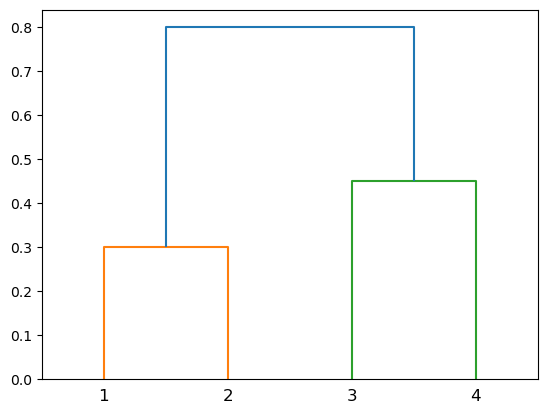

In [14]:
distance_matrix = np.array([
    [0.0, 0.3, 0.4, 0.7], 
    [0.3, 0.0, 0.5, 0.8], 
    [0.4, 0.5, 0.0, 0.45], 
    [0.7, 0.8, 0.45, 0.0]
])
distances = squareform(distance_matrix)
link_mat = linkage(distances, "complete")
dendrogram(link_mat, labels=["1", "2", "3", "4"])
plt.show()

### b Repeat (a), this time using single linkage clustering.

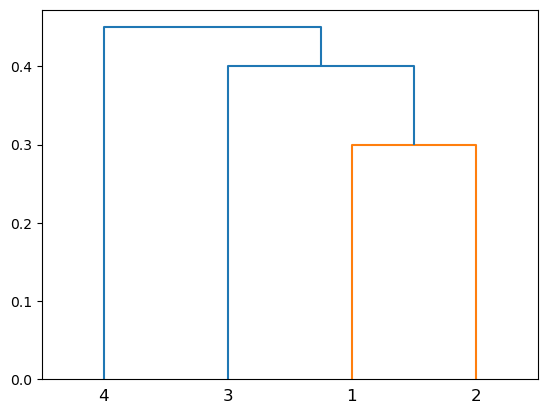

In [15]:
link_mat = linkage(distances, "single")
dendrogram(link_mat, labels=["1", "2", "3", "4"])
plt.show()

### c Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?

Observation 1, 2 belong to cluster A and Observation 3, 4 belong to cluster B

### d Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?

Observation 1, 2, 3 belong to cluster A and Observation 4 belong to cluster B

### e It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

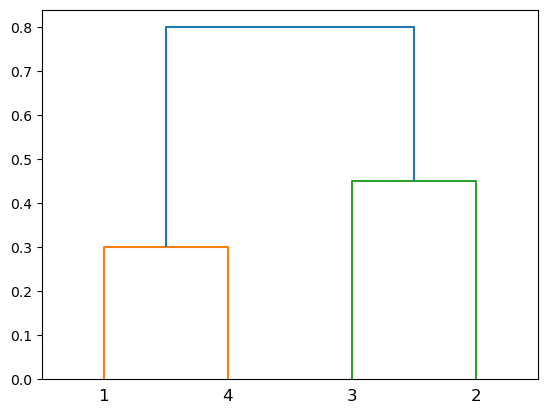

In [17]:
distances = squareform(distance_matrix)
link_mat = linkage(distances, "complete")
dendrogram(link_mat, labels=["1", "4", "3", "2"])
plt.show()